<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj4/zaj4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

# Metoda najmniejszych kwadratów

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


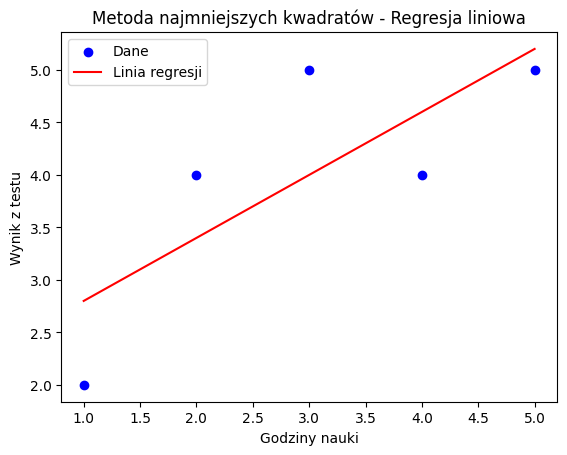

In [15]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [16]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [17]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


In [18]:
# Dane wejściowe
x = np.random.normal(0, 1, 1000)
y = 2 * x + 1 + np.random.normal(0, 0.5, 1000)

In [19]:
# Metoda najmniejszych kwadratów - stats.linregres
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Nachylenie (a) przy użyciu stats.linregres: {slope}")
print(f"Wyraz wolny (b) przy użyciu stats.linregres: {intercept}")
print(f"Współczynnik korelacji (r) przy użyciu stats.linregres: {r_value}")
print(f"Wartość p przy użyciu stats.linregres: {p_value}")
print(f"Błąd standardowy przy użyciu stats.linregres: {std_err}")

Nachylenie (a) przy użyciu stats.linregres: 1.9901746139422098
Wyraz wolny (b) przy użyciu stats.linregres: 0.9700986973516602
Współczynnik korelacji (r) przy użyciu stats.linregres: 0.9695729317265046
Wartość p przy użyciu stats.linregres: 0.0
Błąd standardowy przy użyciu stats.linregres: 0.015906019739987173


In [20]:
# Metoda najmniejszych kwadratów - scipy.optimize.curve_fit
def linear_fit(x, a, b):
    return a * x + b

params, _ = curve_fit(linear_fit, x, y)
a_scipy, b_scipy = params

print(f"Nachylenie (a) przy użyciu scipy.optimize.curve_fit: {a_scipy}")
print(f"Wyraz wolny (b) przy użyciu scipy.optimize.curve_fit: {b_scipy}")

Nachylenie (a) przy użyciu scipy.optimize.curve_fit: 1.9901746134972922
Wyraz wolny (b) przy użyciu scipy.optimize.curve_fit: 0.9700986970863865


In [21]:
# Metoda najmniejszych kwadratów - numpy.polyfit
a_numpy, b_numpy = np.polyfit(x, y, 1)

print(f"Nachylenie (a) przy użyciu numpy.polyfit: {a_numpy}")
print(f"Wyraz wolny (b) przy użyciu numpy.polyfit: {b_numpy}")

Nachylenie (a) przy użyciu numpy.polyfit: 1.9901746139422116
Wyraz wolny (b) przy użyciu numpy.polyfit: 0.9700986973516608


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

Nachylenie (a): -4.1845764854614425
Wyraz wolny (b): 424.582806573957
Współczynnik korelacji (r): -0.2770217010684072
Wartość p: 0.002008352033351012
Błąd standardowy: 1.3249786033923678


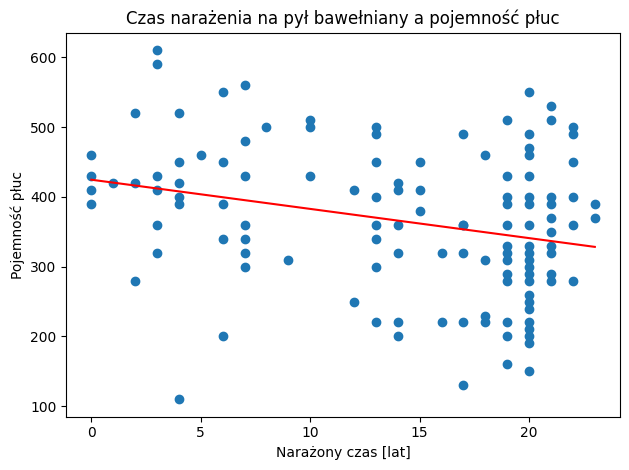

In [22]:
df = pd.read_csv('LungDisease.csv')
x = df['Exposure']
y = df['PEFR']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Nachylenie (a): {slope}")
print(f"Wyraz wolny (b): {intercept}")
print(f"Współczynnik korelacji (r): {r_value}")
print(f"Wartość p: {p_value}")
print(f"Błąd standardowy: {std_err}")

plt.scatter(x, y)
plt.plot(x, linear_fit(x, slope, intercept), color='red')
plt.title("Czas narażenia na pył bawełniany a pojemność płuc")
plt.xlabel('Narażony czas [lat]')
plt.ylabel('Pojemność płuc')
plt.tight_layout()
plt.show()

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



Zestaw danych 1:
  Nachylenie (a): 0.5000909090909091
  Wyraz wolny (b): 3.0000909090909103
  Współczynnik korelacji (r): 0.8164205163448399
  Wartość p: 0.00216962887307879
  Błąd standardowy: 0.11790550059563408
--------------------
Zestaw danych 2:
  Nachylenie (a): 0.5000000000000001
  Wyraz wolny (b): 3.000909090909089
  Współczynnik korelacji (r): 0.816236506000243
  Wartość p: 0.0021788162369107845
  Błąd standardowy: 0.11796374596764074
--------------------
Zestaw danych 3:
  Nachylenie (a): 0.4997272727272729
  Wyraz wolny (b): 3.002454545454544
  Współczynnik korelacji (r): 0.8162867394895984
  Wartość p: 0.002176305279228015
  Błąd standardowy: 0.11787766222100221
--------------------
Zestaw danych 4:
  Nachylenie (a): 0.4999090909090909
  Wyraz wolny (b): 3.0017272727272726
  Współczynnik korelacji (r): 0.8165214368885028
  Wartość p: 0.002164602347197222
  Błąd standardowy: 0.11781894172968553
--------------------


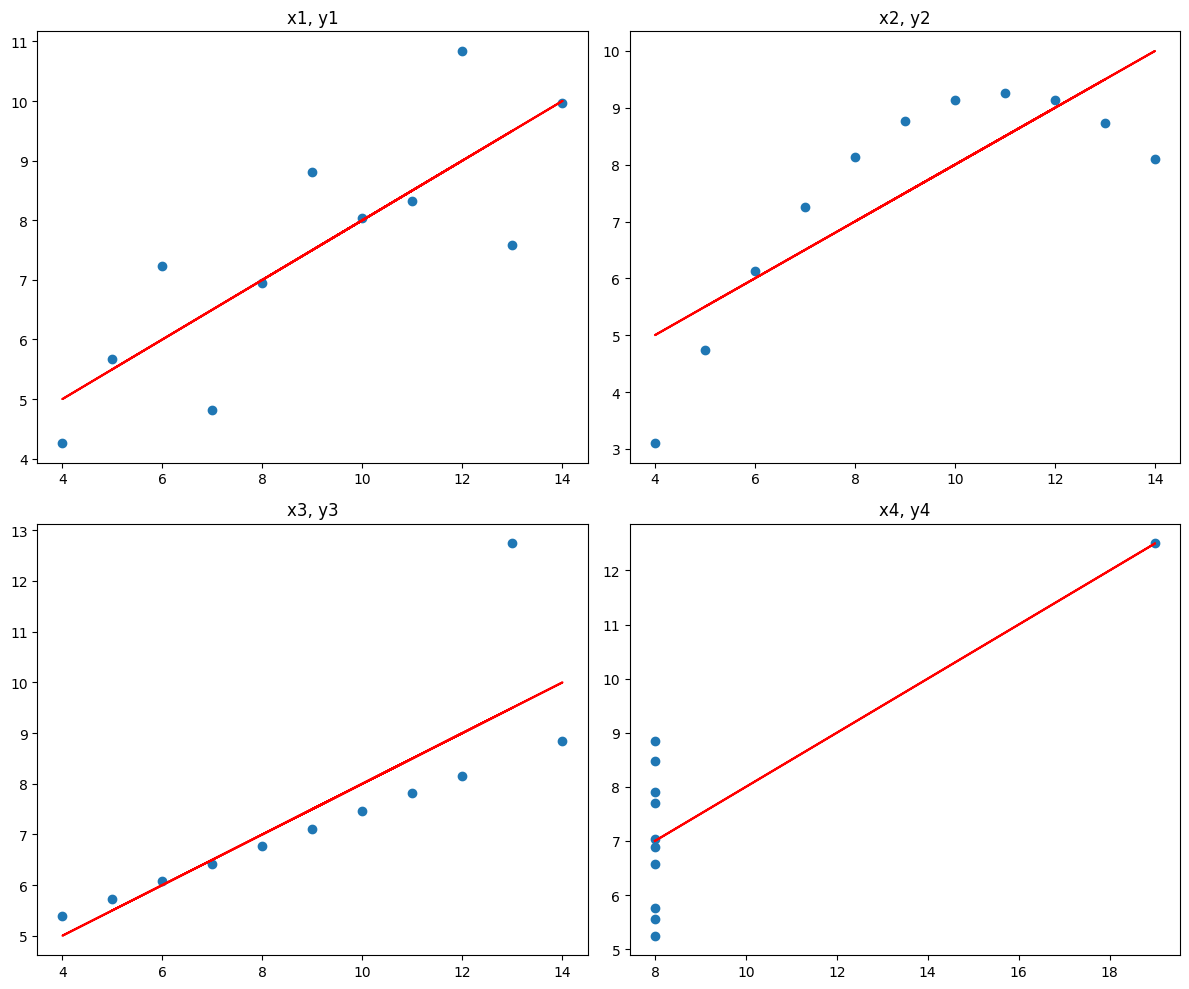

In [23]:
df = pd.read_csv('anscombe.csv')

df.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)

# Convert columns to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# df.head(100)

x_cols = ['x1', 'x2', 'x3', 'x4']
y_cols = ['y1', 'y2', 'y3', 'y4']

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i in range(4):
    x = df[x_cols[i]]
    y = df[y_cols[i]]

    a, b, r, p, std_err = stats.linregress(x, y)

    print(f"Zestaw danych {i+1}:")
    print(f"  Nachylenie (a): {a}")
    print(f"  Wyraz wolny (b): {b}")
    print(f"  Współczynnik korelacji (r): {r}")
    print(f"  Wartość p: {p}")
    print(f"  Błąd standardowy: {std_err}")
    print("-" * 20)

    row = i // 2
    col = i % 2
    ax[row, col].scatter(x, y)
    ax[row, col].set_title(f'{x_cols[i]}, {y_cols[i]}')
    ax[row, col].plot(x, a * x + b, color='red')

plt.tight_layout()
plt.show()